In [1]:
import numpy as np
import pandas as pd

# Prepare dummy returns data with same mean and different volatility

In [2]:
asset_return1 = [0.05, 0.3, -0.1, 0.35, 0.2]
asset_return2 = [0.5, -0.2, 0.3, 0.5, -0.3]

In [3]:
# calculate mean value
print(np.mean(asset_return1))
print(np.mean(asset_return2))
print(np.mean(asset_return1) == np.mean(asset_return2))

0.16
0.16
True


In [4]:
# store in a dataframe
return_df = pd.DataFrame({"Asset1":asset_return1, "Asset2":asset_return2})
return_df

,Asset1,Asset2
0,0.05,0.5
1,0.30,-0.2
2,-0.10,0.3
3,0.35,0.5
4,0.20,-0.3


<Axes: >

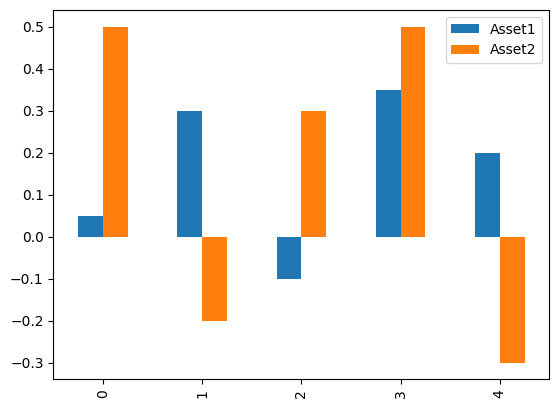

In [5]:
# show price per period via bar plot
return_df.plot.bar()

In [6]:
# column wise std
return_df.std()

Asset1    0.185068
Asset2    0.384708
dtype: float64

In [7]:
# Q: row wise std
return_df.std(axis=1)

0    0.318198
1    0.353553
2    0.282843
3    0.106066
4    0.353553
dtype: float64

In [8]:
# column wise mean
return_df.mean()

Asset1    0.16
Asset2    0.16
dtype: float64

In [9]:
# Q: row wise mean
return_df.mean(axis=1)

0    0.275
1    0.050
2    0.100
3    0.425
4   -0.050
dtype: float64

In [10]:
# convert to 1+R return
return_df + 1

,Asset1,Asset2
0,1.05,1.5
1,1.30,0.8
2,0.90,1.3
3,1.35,1.5
4,1.20,0.7


In [11]:
# build tabel for wealth curve
init_investment = 100
cum_value = (return_df + 1).cumprod()*init_investment
cum_value

,Asset1,Asset2
0,105.0000,150.0
1,136.5000,120.0
2,122.8500,156.0
3,165.8475,234.0
4,199.0170,163.8


<Axes: >

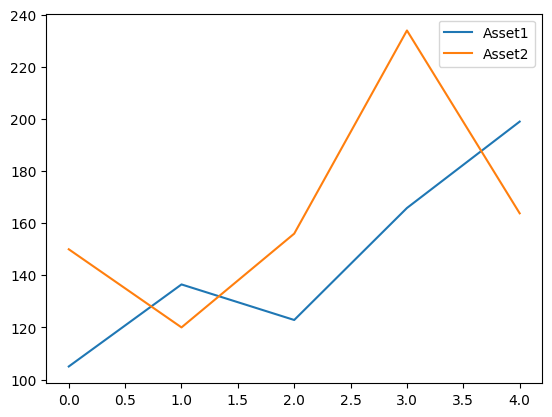

In [12]:
# plot wealth curve
cum_value.plot.line()

<Axes: >

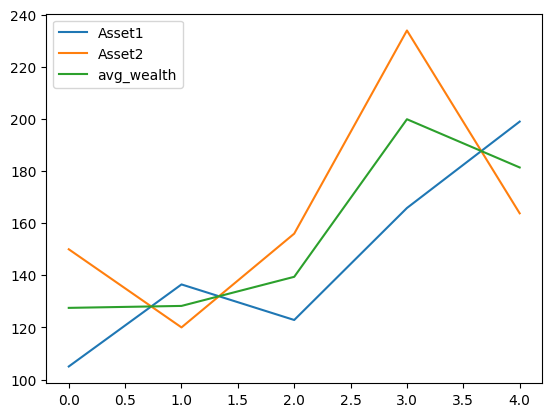

In [13]:
# Q: add period-wise average wealth curve
cum_value['avg_wealth'] = cum_value.mean(axis=1)
cum_value.plot.line()

# From prices to returns

In [14]:
# dummy price
prices = [0.1, 0.2, -0.05, 0.1, 0.12]

In [15]:
# first period return
prices[1]/prices[0] - 1

1.0

In [16]:
# second period return
prices[2]/prices[1] - 1

-1.25

In [17]:
# Q: last period return
prices[-1]/prices[-2] - 1

0.19999999999999996

In [18]:
# calculate sequence of returns - approach one using numpy
print(prices[1:])
print(prices[:-1])
print(np.array(prices[1:])/np.array(prices[:-1])-1)

[0.2, -0.05, 0.1, 0.12]
[0.1, 0.2, -0.05, 0.1]
[ 1.   -1.25 -3.    0.2 ]


In [19]:
# calculate sequence of returns - approach two using pandas
prices_df = pd.DataFrame({"price":prices})
prices_df

,price
0,0.10
1,0.20
2,-0.05
3,0.10
4,0.12


In [20]:
prices_df.iloc[1:]

,price
1,0.20
2,-0.05
3,0.10
4,0.12


In [21]:
prices_df.iloc[:-1]

,price
0,0.10
1,0.20
2,-0.05
3,0.10


In [22]:
# wrong result due to misaligned indexing
prices_df.iloc[1:]/prices_df.iloc[:-1]

,price
0,NaN
1,1.0
2,1.0
3,1.0
4,NaN


In [23]:
# remove indexing by accesing the values attribute
prices_df.iloc[1:].values/prices_df.iloc[:-1] - 1

,price
0,1.00
1,-1.25
2,-3.00
3,0.20


In [24]:
# alternative: only need to access the values of one
prices_df.iloc[1:]/prices_df.iloc[:-1].values - 1

,price
1,1.00
2,-1.25
3,-3.00
4,0.20


In [25]:
# approach three - using the shift function
prices_df.shift(1)

,price
0,NaN
1,0.10
2,0.20
3,-0.05
4,0.10


In [26]:
# no return on the first day
prices_df/prices_df.shift(1) - 1

,price
0,NaN
1,1.00
2,-1.25
3,-3.00
4,0.20


In [27]:
# approach four - using the pct_change function
returns_df = prices_df.pct_change()
returns_df

,price
0,NaN
1,1.00
2,-1.25
3,-3.00
4,0.20


In [28]:
# Q: calculate compounded terminal

# approach one - numpy
# get the compounded return by multplying all previous single period returns and minus one
np.prod(returns_df + 1) - 1

# approach two - pandas
(returns_df+1).prod() - 1

price    0.2
dtype: float64

# Annualization

In [29]:
# annualize the daily return, assuming 252 trading days
r = 0.0001
(1+r)**252-1

0.025518911987694626

In [30]:
# Q: monthly return
r = 0.01
(1+r)**12-1

0.12682503013196977

In [31]:
# Q: quarterly return
r = 0.05
(1+r)**4-1

0.21550625000000023

# Sharpe ratio

## Dummy example

In [32]:
# a simple example illustrating the calculation of sharpe ratio
p1_ret = 0.05
p1_vol = 0.2
p2_ret = 0.1
p2_vol = 0.5
risk_free_rate = 0.03

In [33]:
p1_ret / p1_vol

0.25

In [34]:
p2_ret / p2_vol

0.2

In [35]:
(p1_ret - risk_free_rate) / p1_vol

0.10000000000000002

In [36]:
(p2_ret - risk_free_rate) / p2_vol

0.14

## Real example

In [37]:
!pip install yfinance

In [38]:
import yfinance as yf
prices_df = yf.download(["AAPL","GOOG"], start="2023-01-01")
prices_df.head()

[*********************100%%**********************]  2 of 2 completed


Adj Close                  Close                   High  \
                  AAPL       GOOG        AAPL       GOOG        AAPL   
Date                                                                   
2023-01-03  124.538658  89.699997  125.070000  89.699997  130.899994   
2023-01-04  125.823189  88.709999  126.360001  88.709999  128.660004   
2023-01-05  124.488876  86.769997  125.019997  86.769997  127.769997   
2023-01-06  129.069321  88.160004  129.619995  88.160004  130.289993   
2023-01-09  129.597061  88.800003  130.149994  88.800003  133.410004   

                              Low                   Open             \
                 GOOG        AAPL       GOOG        AAPL       GOOG   
Date                                                                  
2023-01-03  91.550003  124.169998  89.019997  130.279999  89.830002   
2023-01-04  91.239998  125.080002  87.800003  126.889999  91.010002   
2023-01-05  88.209999  124.760002  86.559998  127.129997  88.070000   
2023-01-06  88.470001  124.889999  85.570000  126.010002  87.360001   
2023-01-09  90.830002  129.889999  88.580002  130.470001  89.195000   

               Volume            
                 AAPL      GOOG  
Date                             
2023-01-03  112117500  20738500  
2023-01-04   89113600  27046500  
2023-01-05   80962700  23136100  
2023-01-06   87754700  26612600  
2023-01-09   70790800  22996700

In [39]:
# convert datetime index to date format
prices_df.index = prices_df.index.date
# keep adjusted close
prices_df = prices_df['Adj Close']
prices_df.head()

,AAPL,GOOG
2023-01-03,124.538658,89.699997
2023-01-04,125.823189,88.709999
2023-01-05,124.488876,86.769997
2023-01-06,129.069321,88.160004
2023-01-09,129.597061,88.800003


In [40]:
# insert NA value
test_df = prices_df
test_df.iloc[2,1] = None
test_df.head()

,AAPL,GOOG
2023-01-03,124.538658,89.699997
2023-01-04,125.823189,88.709999
2023-01-05,124.488876,NaN
2023-01-06,129.069321,88.160004
2023-01-09,129.597061,88.800003


In [41]:
# Q: fill in NA with mean
# calculate the mean
mean_GOOG = test_df['GOOG'].mean()

# replace NA values with the mean
test_df['GOOG'].fillna(mean_GOOG, inplace=True)

test_df.head()

<ipython-input-41-66363b706fcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GOOG'].fillna(mean_GOOG, inplace=True)


,AAPL,GOOG
2023-01-03,124.538658,89.699997
2023-01-04,125.823189,88.709999
2023-01-05,124.488876,111.250155
2023-01-06,129.069321,88.160004
2023-01-09,129.597061,88.800003


In [42]:
# insert outlier value
test_df.iloc[1,0] = 200
test_df.head()

<ipython-input-42-9356c451f538>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.iloc[1,0] = 200


,AAPL,GOOG
2023-01-03,124.538658,89.699997
2023-01-04,200.000000,88.709999
2023-01-05,124.488876,111.250155
2023-01-06,129.069321,88.160004
2023-01-09,129.597061,88.800003


In [43]:
# Q: replace the outlier value with the mean value calculated based on non-outlier entries
# calculate the percentile threshold
upper_percentile = test_df['AAPL'].quantile(0.99)

# check if a value is above the percentile
outliers = test_df['AAPL'] > upper_percentile

# calculate the mean excluding outliers
mean_excluding_outliers = test_df.loc[~outliers, 'AAPL'].mean()

# replace outliers with the mean
test_df.loc[outliers, 'AAPL'] = mean_excluding_outliers

test_df.head()

,AAPL,GOOG
2023-01-03,124.538658,89.699997
2023-01-04,166.733663,88.709999
2023-01-05,124.488876,111.250155
2023-01-06,129.069321,88.160004
2023-01-09,129.597061,88.800003


In [44]:
# convert raw price to simple returns
returns_df = prices_df.pct_change()
returns_df.head()

,AAPL,GOOG
2023-01-03,NaN,NaN
2023-01-04,0.338810,-0.011037
2023-01-05,-0.253367,0.254088
2023-01-06,0.036794,-0.207552
2023-01-09,0.004089,0.007260


In [45]:
# drop na
returns_df = returns_df.dropna()
returns_df.head()

,AAPL,GOOG
2023-01-04,0.338810,-0.011037
2023-01-05,-0.253367,0.254088
2023-01-06,0.036794,-0.207552
2023-01-09,0.004089,0.007260
2023-01-10,0.004456,0.004955


## Deriving mean, variance and standard deviation of returns

In [46]:
# asset return using arithmetic mean
returns_df.mean()

AAPL    0.002999
GOOG    0.002854
dtype: float64

In [47]:
# by default use column-wise std
returns_df.std(axis=0)

AAPL    0.039956
GOOG    0.032793
dtype: float64

In [48]:
# row-wise std - not needed
returns_df.std(axis=1)

2023-01-04    0.247379
2023-01-05    0.358825
2023-01-06    0.172778
2023-01-09    0.002242
2023-01-10    0.000352
                ...   
2023-08-21    0.000945
2023-08-22    0.001421
2023-08-23    0.003672
2023-08-24    0.003695
2023-08-25    0.007476
Length: 162, dtype: float64

In [49]:
# Q: calculate volatility manuaxlly
# step 1: de-mean
deviations_df = returns_df - returns_df.mean()
deviations_df.head()

,AAPL,GOOG
2023-01-04,0.335812,-0.013890
2023-01-05,-0.256366,0.251234
2023-01-06,0.033795,-0.210405
2023-01-09,0.001090,0.004406
2023-01-10,0.001458,0.002101


In [50]:
# step 2: square the deviations
squared_deviations_df = deviations_df**2
squared_deviations_df.head()

,AAPL,GOOG
2023-01-04,0.112769,0.000193
2023-01-05,0.065723,0.063119
2023-01-06,0.001142,0.044270
2023-01-09,0.000001,0.000019
2023-01-10,0.000002,0.000004


In [51]:
# step 3: calculate average squared deviations, i.e., variance
variance = squared_deviations_df.mean()
variance

AAPL    0.001587
GOOG    0.001069
dtype: float64

In [52]:
# step 4: take square root to get standard deviation/volatility
# result is differnt from std() which devides the sum by n-1 instead of n here
volatility = np.sqrt(variance)
volatility

AAPL    0.039833
GOOG    0.032692
dtype: float64

In [53]:
# adjust from step 3 onwards
num_rows = squared_deviations_df.shape[0]
variance2 = squared_deviations_df.sum() / (num_rows-1)
variance2

AAPL    0.001597
GOOG    0.001075
dtype: float64

In [54]:
volatility2 = np.sqrt(variance2)
volatility2

AAPL    0.039956
GOOG    0.032793
dtype: float64

## Annualizing volatility

In [55]:
# the returns are daily, so we multiply by square root of 252
annualized_vol = returns_df.std()*np.sqrt(252)
annualized_vol

AAPL    0.634286
GOOG    0.520578
dtype: float64

In [56]:
# another way to do square root
annualized_vol = returns_df.std()*(252**0.5)
annualized_vol

AAPL    0.634286
GOOG    0.520578
dtype: float64

## Annualizing returns

In [57]:
# average daily return as geometric mean
returns_per_day = (returns_df+1).prod()**(1/returns_df.shape[0]) - 1
returns_per_day

AAPL    0.002228
GOOG    0.002326
dtype: float64

In [58]:
# calculate annualized return
annualized_return = (returns_per_day+1)**252-1
annualized_return

AAPL    0.752276
GOOG    0.795790
dtype: float64

In [59]:
# Q: combine both steps in one shot
annualized_return = (returns_df+1).prod()**(252/returns_df.shape[0])-1
annualized_return

AAPL    0.752276
GOOG    0.795790
dtype: float64

## Calculating Sharpe ratio

In [60]:
# assume a constant risk free rate
riskfree_rate = 0.03

In [61]:
excess_return = annualized_return - riskfree_rate

In [62]:
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

AAPL    1.138722
GOOG    1.471038
dtype: float64